In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# import citipy module 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
cities


['laguna',
 'taolanaro',
 'ushuaia',
 'pevek',
 'bluff',
 'geraldton',
 'mataura',
 'nguiu',
 'chapais',
 'hobart',
 'buraydah',
 'saskylakh',
 'hermanus',
 'albany',
 'florianopolis',
 'pietarsaari',
 'puerto ayora',
 'kruisfontein',
 'nanortalik',
 'cabo san lucas',
 'paamiut',
 'ahipara',
 'yellowknife',
 'huarmey',
 'tura',
 'amapa',
 'port alfred',
 'upernavik',
 'bethel',
 'halalo',
 'berdigestyakh',
 'leningradskiy',
 'whithorn',
 'provideniya',
 'mount isa',
 'shevchenko',
 'souillac',
 'los llanos de aridane',
 'khristoforovo',
 'vardo',
 'kavaratti',
 'saint-pierre',
 'broken hill',
 'bredasdorp',
 'port blair',
 'hilo',
 'kalaleh',
 'pacific grove',
 'porto novo',
 'east london',
 'khandbari',
 'buta',
 'ribeira grande',
 'angra',
 'hasaki',
 'cabo rojo',
 'thompson',
 'port elizabeth',
 'cape town',
 'challapata',
 'muroto',
 'illoqqortoormiut',
 'punta arenas',
 'busselton',
 'klaksvik',
 'rundu',
 'marsa matruh',
 'ancud',
 'nizhneyansk',
 'marzuq',
 'alice springs',
 'tu

In [7]:
# Import the requests library
import requests

#Import the API library
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data/
city_data = []

In [9]:
#Print the beginning of the logging. 
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



Beginning Data Retrieval      
------------------------------


In [10]:
    city_url = url + "&q=" + "Sarasota"
    print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e02172788b7c8380220265e012fc2daf&q=Sarasota


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
        
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | nguiu
City not found. Skipping...
Processing Record 9 of Set 1 | chapais
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | buraydah
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | florianopolis
Processing Record 16 of Set 1 | pietarsaari
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | nanortalik
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | paamiut
Processing Record 22 of Set 1 | ahipara
Processing Record 23 of Set 1 | yellowknife


Processing Record 40 of Set 4 | jijiga
Processing Record 41 of Set 4 | kaohsiung
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | acapulco
Processing Record 44 of Set 4 | lavrentiya
Processing Record 45 of Set 4 | thinadhoo
Processing Record 46 of Set 4 | kapaa
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | berlevag
Processing Record 49 of Set 4 | bua yai
Processing Record 50 of Set 4 | gewane
Processing Record 1 of Set 5 | bellary
Processing Record 2 of Set 5 | arica
Processing Record 3 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | gizo
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | saint-joseph
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | rio gallegos
Processing Record 10 of Set 5 | tuatapere
Processing Record 11 of Set 5 | inhambane
Processing Record 12 of Set 5 | avarua
P

Processing Record 28 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 29 of Set 8 | pochutla
Processing Record 30 of Set 8 | andilamena
Processing Record 31 of Set 8 | olhao
Processing Record 32 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 33 of Set 8 | airai
Processing Record 34 of Set 8 | kodiak
Processing Record 35 of Set 8 | zabol
Processing Record 36 of Set 8 | mountain home
Processing Record 37 of Set 8 | komsomolskiy
Processing Record 38 of Set 8 | guamuchil
Processing Record 39 of Set 8 | bentiu
Processing Record 40 of Set 8 | yining
Processing Record 41 of Set 8 | baracoa
Processing Record 42 of Set 8 | marcona
City not found. Skipping...
Processing Record 43 of Set 8 | teeli
Processing Record 44 of Set 8 | haibowan
City not found. Skipping...
Processing Record 45 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 8 | tual
Processing Record 47 of Set 8 | praia da vitoria
Processing Record 48 of Set 8 | 

Processing Record 12 of Set 12 | kjopsvik
Processing Record 13 of Set 12 | muros
Processing Record 14 of Set 12 | strezhevoy
Processing Record 15 of Set 12 | kibondo
Processing Record 16 of Set 12 | muzhi
Processing Record 17 of Set 12 | mahajanga
Processing Record 18 of Set 12 | bilibino
Processing Record 19 of Set 12 | warqla
City not found. Skipping...
Processing Record 20 of Set 12 | sogdiondon
City not found. Skipping...
Processing Record 21 of Set 12 | dengfeng
Processing Record 22 of Set 12 | hervey bay
Processing Record 23 of Set 12 | vila velha
Processing Record 24 of Set 12 | mogok
Processing Record 25 of Set 12 | melivoia
Processing Record 26 of Set 12 | zhigansk
Processing Record 27 of Set 12 | leeds
Processing Record 28 of Set 12 | manjacaze
Processing Record 29 of Set 12 | sorland
Processing Record 30 of Set 12 | exeter
Processing Record 31 of Set 12 | lagunas
Processing Record 32 of Set 12 | bathsheba
Processing Record 33 of Set 12 | merrill
Processing Record 34 of Set 1

In [12]:
len(cities)

627

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laguna,38.42,-121.42,82.99,30,1,3.36,US,2020-04-22 22:31:39
1,Ushuaia,-54.80,-68.30,41.00,65,56,10.29,AR,2020-04-22 22:35:07
2,Pevek,69.70,170.31,14.29,92,0,5.39,RU,2020-04-22 22:35:54
3,Bluff,-46.60,168.33,54.00,73,98,5.01,NZ,2020-04-22 22:35:54
4,Geraldton,-28.77,114.60,59.00,87,93,6.93,AU,2020-04-22 22:31:06
5,Mataura,-46.19,168.86,54.00,73,98,5.01,NZ,2020-04-22 22:35:54
6,Chapais,49.78,-74.85,15.80,78,90,17.22,CA,2020-04-22 22:35:54
7,Hobart,-42.88,147.33,54.00,57,75,8.05,AU,2020-04-22 22:35:26
8,Buraydah,26.33,43.98,73.40,69,0,3.36,SA,2020-04-22 22:35:55
9,Saskylakh,71.92,114.08,19.36,96,80,4.36,RU,2020-04-22 22:35:55


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2020-04-22 22:31:39,38.42,-121.42,82.99,30,1,3.36
1,Ushuaia,AR,2020-04-22 22:35:07,-54.80,-68.30,41.00,65,56,10.29
2,Pevek,RU,2020-04-22 22:35:54,69.70,170.31,14.29,92,0,5.39
3,Bluff,NZ,2020-04-22 22:35:54,-46.60,168.33,54.00,73,98,5.01
4,Geraldton,AU,2020-04-22 22:31:06,-28.77,114.60,59.00,87,93,6.93


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data_cities.csv"

# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

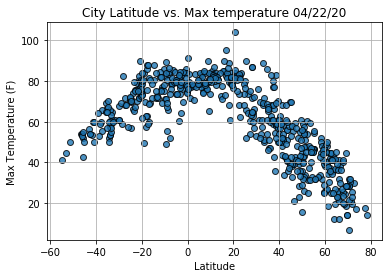

In [22]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("weather_data_Fig1.png")

# Show PLt.
plt.show()

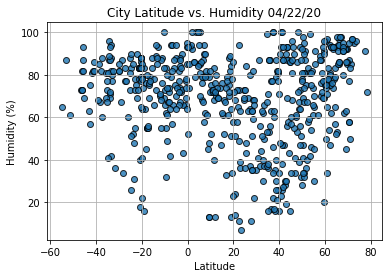

In [23]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("weather_data_Fig2.png")

# Show PLt.
plt.show()

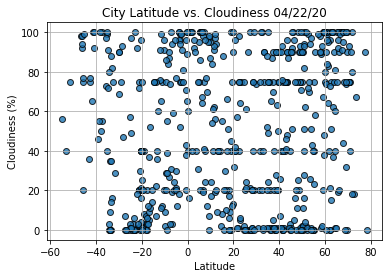

In [26]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("weather_data_Fig3.png")

# Show PLt.
plt.show()

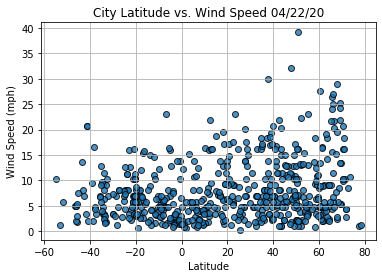

In [27]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure
plt.savefig("weather_data_Fig4.png")

# Show PLt.
plt.show()

In [86]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [87]:
# Perform the linear regression
(slope, intercept, rval, pval, stderr) = linregress(lats,max_temps)

In [88]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

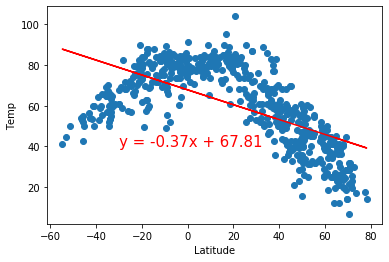

In [96]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-30,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [101]:
# Create a function to perform linear regression on the weather data. 
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data. 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line. 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [102]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2020-04-22 22:31:39,38.42,-121.42,82.99,30,1,3.36
2,Pevek,RU,2020-04-22 22:35:54,69.70,170.31,14.29,92,0,5.39
6,Chapais,CA,2020-04-22 22:35:54,49.78,-74.85,15.80,78,90,17.22
8,Buraydah,SA,2020-04-22 22:35:55,26.33,43.98,73.40,69,0,3.36
9,Saskylakh,RU,2020-04-22 22:35:55,71.92,114.08,19.36,96,80,4.36


In [103]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ushuaia,AR,2020-04-22 22:35:07,-54.80,-68.30,41.0,65,56,10.29
3,Bluff,NZ,2020-04-22 22:35:54,-46.60,168.33,54.0,73,98,5.01
4,Geraldton,AU,2020-04-22 22:31:06,-28.77,114.60,59.0,87,93,6.93
5,Mataura,NZ,2020-04-22 22:35:54,-46.19,168.86,54.0,73,98,5.01
7,Hobart,AU,2020-04-22 22:35:26,-42.88,147.33,54.0,57,75,8.05


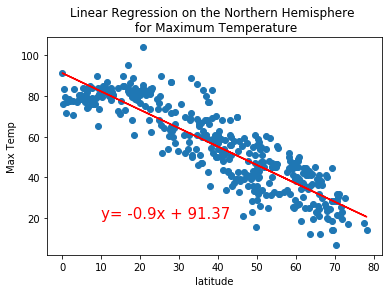

In [104]:
# Linear regression for the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

In [105]:
linregress(lats,humidity)

LinregressResult(slope=-0.022774943059510784, intercept=69.82915383194052, rvalue=-0.036419226400764865, pvalue=0.38420901200869984, stderr=0.026152928268703177)

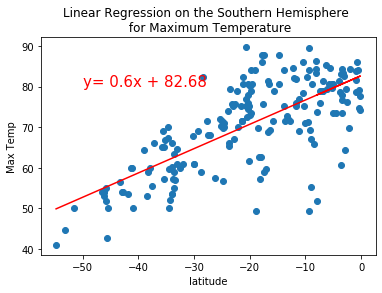

In [112]:
# Linear regression for the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

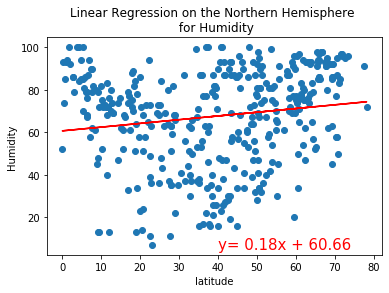

In [118]:
# Linear regression on the Northern hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Humidity', 'Humidity',(40,5))

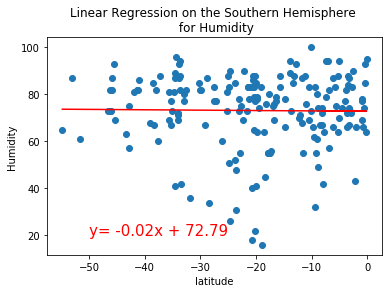

In [114]:
# Linear regression on the Southern hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Humidity', 'Humidity',(-50,20))

In [107]:
linregress(lats,cloudiness)

LinregressResult(slope=0.12114577835394877, intercept=48.865114967851156, rvalue=0.10939166015694063, pvalue=0.008774823363162283, stderr=0.04606720297144316)

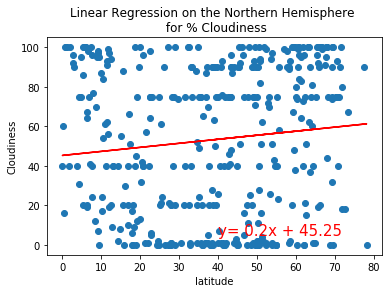

In [119]:
# Linear regression on the Northern hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(40,5))

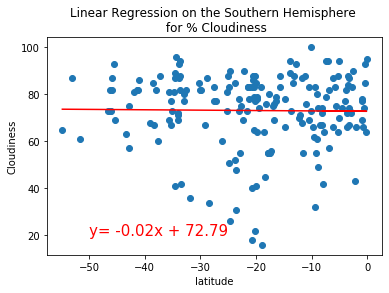

In [120]:
# Linear regression on the Southern hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-50,20))

In [41]:
linregress(lats,wind_speed)

LinregressResult(slope=0.039971863728807025, intercept=7.041230006099503, rvalue=0.22847321282604913, pvalue=3.1944751366340865e-08, stderr=0.00712786400911023)

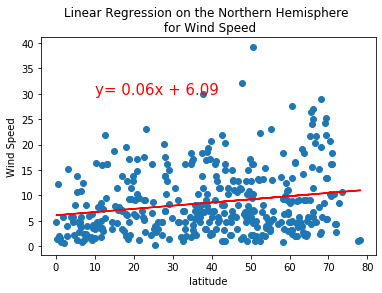

In [123]:
# Linear regression on the Northern hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,30))

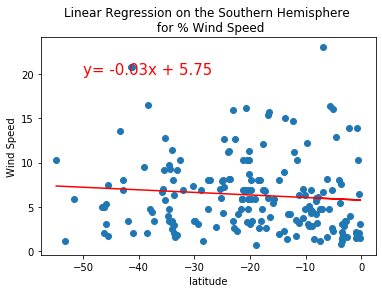

In [122]:
# Linear regression on the Southern hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))